In [1]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv('./updated_dataset_for_cdom.csv')
y = data['cdom'].values
X = data.drop(['cdom'], axis=1).values
wl = np.arange(400,1000,6)

In [3]:
print(X)

[[5.6313938e-02 6.4315565e-02 6.7075249e-02 ... 2.3100000e-08
  2.0600000e-08 1.8400000e-08]
 [2.3800614e-02 2.6113095e-02 2.7362431e-02 ... 2.3100000e-08
  2.0600000e-08 1.8400000e-08]
 [1.4293094e-02 1.5436191e-02 1.6183764e-02 ... 2.3100000e-08
  2.0600000e-08 1.8400000e-08]
 ...
 [1.4979100e-04 1.5570900e-04 1.6196000e-04 ... 2.3100000e-08
  2.0600000e-08 1.8400000e-08]
 [1.4903200e-04 1.5491900e-04 1.6113800e-04 ... 2.3100000e-08
  2.0600000e-08 1.8400000e-08]
 [1.4828100e-04 1.5413800e-04 1.6032500e-04 ... 2.3100000e-08
  2.0600000e-08 1.8400000e-08]]


In [4]:
print(y)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [5]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
   
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
       
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/n_comp
       
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
   
    
    return msemin

100% completed
Suggested number of components:  12



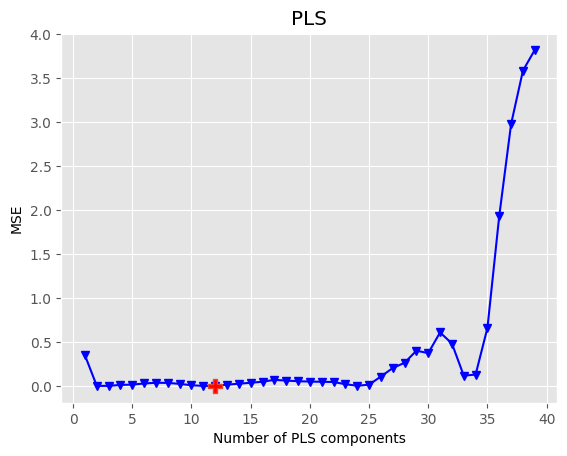

In [6]:
msemin=optimise_pls_cv(X,y,40, plot_components=True)

R2 calib: 1.000
MAE calib: 0.002
MSE calib: 0.000


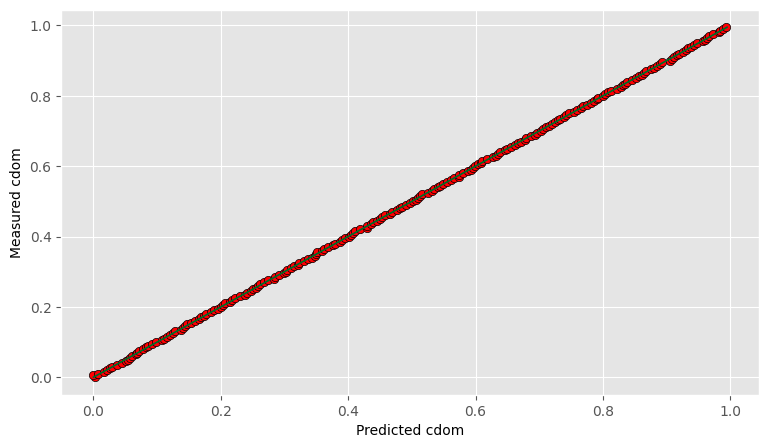

In [7]:


pls_opt = PLSRegression(n_components=12)


pls_opt.fit(X, y)
y_c = pls_opt.predict(X)


# y_cv = cross_val_predict(pls_opt, X, y, cv=10)


score_c = r2_score(y, y_c)
# score_cv = r2_score(y, y_cv)


mse_c = mean_squared_error(y, y_c)
# mse_cv = mean_squared_error(y, y_cv)
mae_c=mean_absolute_error(y,y_c)
# mae_cv=mean_absolute_error(y,y_cv)

print('R2 calib: %5.3f'  % score_c)
# print('R2 CV: %5.3f'  % score_cv)
print('MAE calib: %5.3f' % mae_c)
# print('MAE CV: %5.3f' % mae_cv)
print('MSE calib: %5.3f' % mse_c)
# print('MSE CV: %5.3f' % mse_cv)



rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)


z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
#         plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted cdom')
    plt.ylabel('Measured cdom')

    plt.show()


In [8]:
data1 = pd.read_csv('./Transposed_graph_data_cdom.csv')
y1 = data1['cdom'].values
X1 = data1.drop(['cdom'], axis=1).values
wl1 = np.arange(400,1000,6)

In [9]:
print(y1)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [10]:
print(X1)

[[5.61613276e-02 6.41181868e-02 6.68652162e-02 ... 2.41433858e-08
  2.15530205e-08 1.92922961e-08]
 [2.37832085e-02 2.60921720e-02 2.73407820e-02 ... 2.41433858e-08
  2.15530204e-08 1.92922961e-08]
 [1.42926534e-02 1.54357125e-02 1.61838480e-02 ... 2.41433858e-08
  2.15530204e-08 1.92922960e-08]
 ...
 [1.49952515e-04 1.55887797e-04 1.62157409e-04 ... 2.41433774e-08
  2.15530142e-08 1.92922915e-08]
 [1.49192675e-04 1.55097352e-04 1.61334910e-04 ... 2.41433773e-08
  2.15530142e-08 1.92922914e-08]
 [1.48440495e-04 1.54314881e-04 1.60520712e-04 ... 2.41433773e-08
  2.15530141e-08 1.92922914e-08]]


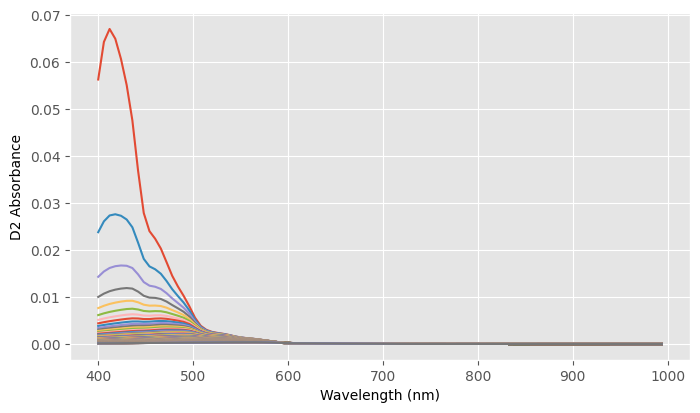

In [11]:
X2 = savgol_filter(X1, 17, polyorder = 2,deriv=2)
 

plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
    plt.show()

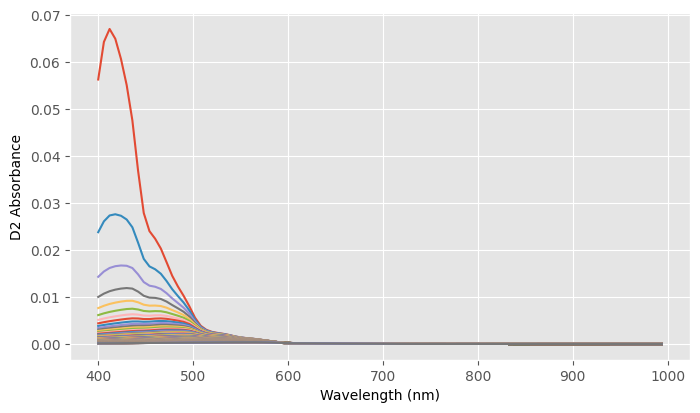

In [12]:
X2 = savgol_filter(X, 17, polyorder = 2,deriv=2)
 

plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
    plt.show()

In [13]:
y_c1 = pls_opt.predict(X1)
score_c = r2_score(y1, y_c1)
mse_c = mean_squared_error(y1, y_c1)
mae_c=mean_absolute_error(y1,y_c1)


print('R2 calib: %5.3f'  % score_c)
print('MAE calib: %5.3f' % mae_c)
print('MSE calib: %5.3f' % mse_c)
 


R2 calib: 0.933
MAE calib: 0.074
MSE calib: 0.006


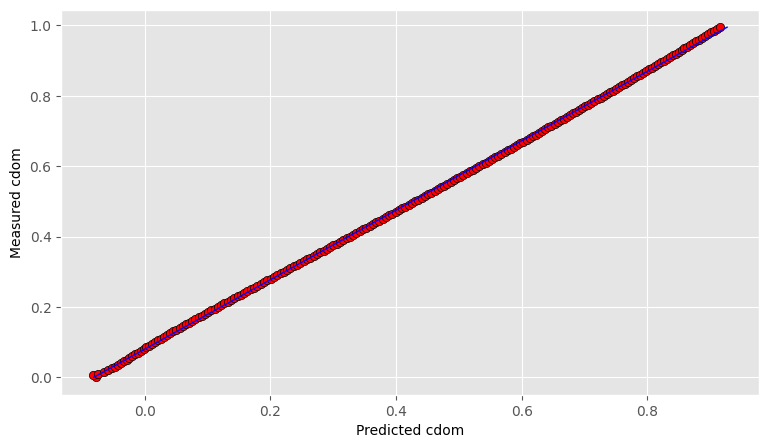

In [14]:
rangey = max(y1) - min(y1)
rangex = max(y_c1) - min(y_c1)


z = np.polyfit(y1, y_c1, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c1, y1, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y1), y1, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
#     ax.plot(y, y1, color='green', linewidth=1)
#         plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted cdom')
    plt.ylabel('Measured cdom')

    plt.show()

In [15]:

# Trial code
pls_opt1 = PLSRegression(n_components=12)
pls_opt1.fit(X, y)
y_c1 = pls_opt1.predict(X1)
# y_cv = cross_val_predict(pls_opt, X, y, cv=10)
score_c = r2_score(y1, y_c1)
# score_cv = r2_score(y, y_cv)


mse_c = mean_squared_error(y1, y_c1)
# mse_cv = mean_squared_error(y, y_cv)
mae_c=mean_absolute_error(y1,y_c1)
# mae_cv=mean_absolute_error(y,y_cv)

print('R2 calib: %5.3f'  % score_c)
# print('R2 CV: %5.3f'  % score_cv)
print('MAE calib: %5.3f' % mae_c)
# print('MAE CV: %5.3f' % mae_cv)
print('MSE calib: %5.3f' % mse_c)
# print('MSE CV: %5.3f' % mse_cv)
# z1 = np.polyfit(y1, y_c1, 1)
 



R2 calib: 0.933
MAE calib: 0.074
MSE calib: 0.006
